<a href="https://colab.research.google.com/github/SarraLKSC/Deep_Learning_on_the_Simpsons/blob/main/Simpsons_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Info**


*   **Computer vision training camp** for Micro Club's 1st wave of internal trainings.
* **Trainer:**  Sarra Laksaci -> SarraLKSC#7509 , saralaksaci@gmail.com





Avant de passer aux prochaines activités de Computer Vision nous allons aujourdhui cloturer la partie classification avec ce petit exemple assez amusant qui traite les personnages des Simpsons.


[Dataset description](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset?select=simpsons_dataset)
![](https://cdn-images-1.medium.com/max/800/1*64laQlCh-57A6AyTXAeRWQ.png)

In [ ]:
import tensorflow as tf 
import tensorflow_hub as hub
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import shutil
import cv2
import os

[how to load dataset from kaggle](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 99% 1.07G/1.08G [00:04<00:00, 257MB/s]
100% 1.08G/1.08G [00:04<00:00, 240MB/s]


In [ ]:
!ls

kaggle.json  sample_data  the-simpsons-characters-dataset.zip


In [ ]:
!unzip the-simpsons-characters-dataset.zip 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simp

In [ ]:
!ls

annotation.txt		     sample_data
characters_illustration.png  simpsons_dataset
kaggle.json		     the-simpsons-characters-dataset.zip
kaggle_simpson_testset	     weights.best.hdf5
number_pic_char.csv


In [ ]:
df=pd.read_csv('number_pic_char.csv')
df

,Unnamed: 0,name,total,train,test,bounding_box
0,0,Homer Simpson,2246,1909,337,612
1,1,Ned Flanders,1454,1236,218,595
2,2,Moe Szyslak,1452,1234,218,215
3,3,Lisa Simpson,1354,1151,203,562
4,4,Bart Simpson,1342,1141,201,554
5,5,Marge Simpson,1291,1097,194,557
6,6,Krusty The Clown,1206,1025,181,226
7,7,Principal Skinner,1194,1015,179,506
8,8,Charles Montgomery Burns,1193,1014,179,650
9,9,Milhouse Van Houten,1079,917,162,210


In [ ]:
drop_classes=[]
for name in df.iloc[10:]['name']:
  name=name.lower()
  vect=name.split()
  correct_form=vect[0]
  if len(vect)>1:
    for i in range(len(vect)-1):
      correct_form=correct_form+'_'+vect[i+1]
  drop_classes.append(correct_form)
  print(correct_form)


chief_wiggum
abraham_grampa_simpson
sideshow_bob
apu_nahasapeemapetilon
kent_brockman
comic_book_guy
edna_krabappel
nelson_muntz
lenny_leonard
mayor_quimby
waylon_smithers
maggie_simpson
groundskeeper_willie
barney_gumble
selma_bouvier
carl_carlson
ralph_wiggum
patty_bouvier
martin_prince
professor_john_frink
snake_jailbird
cletus_spuckler
rainier_wolfcastle
agnes_skinner
sideshow_mel
otto_mann
fat_tony
gil
miss_hoover
disco_stu
troy_mcclure
lionel_hutz
jimbo_jones
bumblebee_man
hans_moleman
helen_lovejoy
jasper_beardly


In [ ]:
len(drop_classes)

37

In [ ]:
!ls ./simpsons_dataset

abraham_grampa_simpson	  homer_simpson        otto_mann
agnes_skinner		  kent_brockman        patty_bouvier
apu_nahasapeemapetilon	  krusty_the_clown     principal_skinner
barney_gumble		  lenny_leonard        professor_john_frink
bart_simpson		  lionel_hutz	       rainier_wolfcastle
carl_carlson		  lisa_simpson	       ralph_wiggum
charles_montgomery_burns  maggie_simpson       selma_bouvier
chief_wiggum		  marge_simpson        sideshow_bob
cletus_spuckler		  martin_prince        sideshow_mel
comic_book_guy		  mayor_quimby	       simpsons_dataset
disco_stu		  milhouse_van_houten  snake_jailbird
edna_krabappel		  miss_hoover	       troy_mcclure
fat_tony		  moe_szyslak	       waylon_smithers
gil			  ned_flanders
groundskeeper_willie	  nelson_muntz


In [ ]:
for name in drop_classes:
  path='simpsons_dataset/'+name
  try:
    shutil.rmtree(path)
  except:
    print('')

In [ ]:
!ls simpsons_dataset/

bart_simpson		  lisa_simpson	       ned_flanders
charles_montgomery_burns  marge_simpson        principal_skinner
homer_simpson		  milhouse_van_houten  simpsons_dataset
krusty_the_clown	  moe_szyslak


In [ ]:
class_names=[]
for x in os.listdir('./simpsons_dataset'):
  class_names.append(x)

In [ ]:
for i in class_names:
  print('!mkdir simpsons_testset/{}'.format(i))

!mkdir simpsons_testset/marge_simpson
!mkdir simpsons_testset/principal_skinner
!mkdir simpsons_testset/bart_simpson
!mkdir simpsons_testset/ned_flanders
!mkdir simpsons_testset/simpsons_dataset
!mkdir simpsons_testset/homer_simpson
!mkdir simpsons_testset/lisa_simpson
!mkdir simpsons_testset/krusty_the_clown
!mkdir simpsons_testset/moe_szyslak
!mkdir simpsons_testset/charles_montgomery_burns
!mkdir simpsons_testset/milhouse_van_houten


In [ ]:
!mkdir simpsons_testset
!mkdir simpsons_testset/charles_montgomery_burns
!mkdir simpsons_testset/simpsons_dataset
!mkdir simpsons_testset/ned_flanders
!mkdir simpsons_testset/bart_simpson
!mkdir simpsons_testset/marge_simpson
!mkdir simpsons_testset/homer_simpson
!mkdir simpsons_testset/milhouse_van_houten
!mkdir simpsons_testset/moe_szyslak
!mkdir simpsons_testset/krusty_the_clown
!mkdir simpsons_testset/lisa_simpson
!mkdir simpsons_testset/principal_skinner

In [ ]:
paths={}
for i in class_names:
  paths[i]='simpsons_testset/'+i  

In [ ]:
for i,im in enumerate(os.listdir('kaggle_simpson_testset/kaggle_simpson_testset')):
  image_name_vect=im.split('_')
  class_name=image_name_vect[0]
  for j in range(len(image_name_vect)-2):
    class_name=class_name+'_'+image_name_vect[j+1]
  #print(im)  #im contient le nom de l'image
  #print(class_name) #classe_name contient le nom de la classe et donc le dossier de la classe 
  #on utilise le dictionnaire des chemins pour savoir ou déposer l'image selectionné
  #print('kaggle_simpson_testset/kaggle_simpson_testset/'+im)
  #print(paths[class_name]+'/'+im)
  #print("---------------------------------------------------------")
  if (class_name in paths.keys()):
    os.rename('kaggle_simpson_testset/kaggle_simpson_testset/'+im,paths[class_name]+'/'+im)


  #if i==3:
   # break;

In [ ]:
print('nous avons au totale: {} classes'.format(len(class_names)))
print(class_names)

nous avons au totale: 11 classes
['marge_simpson', 'principal_skinner', 'bart_simpson', 'ned_flanders', 'simpsons_dataset', 'homer_simpson', 'lisa_simpson', 'krusty_the_clown', 'moe_szyslak', 'charles_montgomery_burns', 'milhouse_van_houten']


In [ ]:
!ls ./kaggle_simpson_testset/kaggle_simpson_testset

abraham_grampa_simpson_0.jpg   comic_book_guy_25.jpg  lenny_leonard_3.jpg
abraham_grampa_simpson_10.jpg  comic_book_guy_26.jpg  lenny_leonard_40.jpg
abraham_grampa_simpson_11.jpg  comic_book_guy_27.jpg  lenny_leonard_41.jpg
abraham_grampa_simpson_12.jpg  comic_book_guy_28.jpg  lenny_leonard_42.jpg
abraham_grampa_simpson_13.jpg  comic_book_guy_29.jpg  lenny_leonard_43.jpg
abraham_grampa_simpson_14.jpg  comic_book_guy_2.jpg   lenny_leonard_44.jpg
abraham_grampa_simpson_15.jpg  comic_book_guy_30.jpg  lenny_leonard_45.jpg
abraham_grampa_simpson_16.jpg  comic_book_guy_31.jpg  lenny_leonard_46.jpg
abraham_grampa_simpson_17.jpg  comic_book_guy_32.jpg  lenny_leonard_47.jpg
abraham_grampa_simpson_18.jpg  comic_book_guy_33.jpg  lenny_leonard_48.jpg
abraham_grampa_simpson_19.jpg  comic_book_guy_34.jpg  lenny_leonard_49.jpg
abraham_grampa_simpson_1.jpg   comic_book_guy_36.jpg  lenny_leonard_4.jpg
abraham_grampa_simpson_20.jpg  comic_book_guy_37.jpg  lenny_leonard_5.jpg
abraham_grampa_simpson_21.jp

In [ ]:
Data_gen=ImageDataGenerator(rescale=1./255,rotation_range=10,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
BATCH_SIZE=32
IMG_SHAPE=224
Data_generator=Data_gen.flow_from_directory(directory='./simpsons_dataset',batch_size=BATCH_SIZE,class_mode='categorical',target_size=(IMG_SHAPE,IMG_SHAPE),shuffle=True)
test_generator=test_gen.flow_from_directory(directory='./simpsons_testset',batch_size=BATCH_SIZE,class_mode='categorical',target_size=(IMG_SHAPE,IMG_SHAPE))

Found 34744 images belonging to 11 classes.
Found 496 images belonging to 11 classes.


In [ ]:
sample_training_images, _=next(Data_generator)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

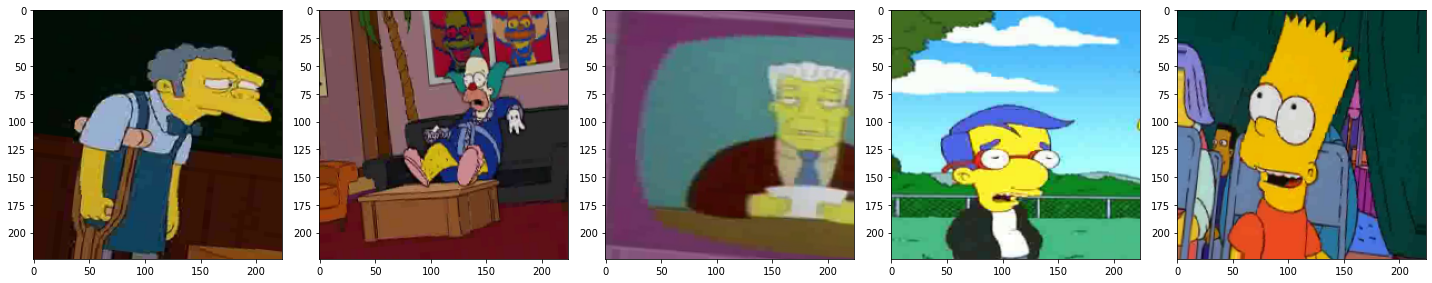

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
for im in sample_training_images[5:10]:
  print(im.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SHAPE,IMG_SHAPE,3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
simpson_model=tf.keras.Sequential([
                                  base_model,
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu',kernel_regularizer='l2'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(256,activation='relu',kernel_regularizer='l2'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(11, activation='softmax'),
])

In [ ]:
simpson_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [ ]:
simpson_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               32113152  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [1]:
history=simpson_model.fit(Data_generator,epochs=10,callbacks=callback,
                                    validation_data=test_generator,steps_per_epoch=np.math.ceil(34744/float(BATCH_SIZE)))

NameError: ignored

In [2]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

NameError: ignored